# 1.1  Understanding of UMAP

Umap is a dimensionality reduction technique which works on graph layouts
The basic idea behind umap is that it constructs a weighted graph in a high dimensional space and then projects it in a low dimensional space.

Construction of the weighted graph is the first step in UMAP as stated in section 3.1 of the paper. The clusters of datapoints are made by UMAP to ensures that datapoint is connected to at least one of the other datapoints with a weighted edge. These locally connected sets (clusters) are the fuzzy simplicial sets. The weighted edge indicates how close two datapoints are.

These locally connected sets are then combined to form a unified topological global representation.
The n-neighbour parameter is used to manipulate the balance between global structure and local structure. If too high, there can be too many connections among datapoints. If too low, there can be many individual clusters.


Then the graph is projected in a low dimensional space such that the global and local structure is preserved.
In comparison with TSNE , UMAP can preserve the neighbourhood of the datapoints as well as distances of the datapoints which are away from clusters but on the other hand TSNE only preserves the neighbourhood of the datapoints.


# 1.2  Implementation of UMAP example

In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.7 MB/s eta 0:00:00


In [1]:
# importing the libraries

import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from umap import UMAP

In [2]:
# dataset used : https://www.kaggle.com/datasets/fernandolima23/classification-in-asteroseismology

data = pd.read_csv("classification_in_asteroseismology.csv")
data

,POP,Dnu,numax,epsilon
0,1,4.44780,43.06289,0.985
1,0,6.94399,74.07646,0.150
2,1,2.64571,21.57891,0.855
3,1,4.24168,32.13189,0.840
4,0,10.44719,120.37356,0.275
...,...,...,...,...
996,0,5.51582,49.99920,0.060
997,1,4.14823,32.09069,0.930
998,1,3.98294,30.90257,0.880
999,1,4.33893,45.62183,0.975


In [3]:
# standardizing the required columns to bring all values to one scale

scaler = StandardScaler()
columns_to_scale = ['Dnu', 'numax', 'epsilon']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

data.head()

,POP,Dnu,numax,epsilon
0,1,-0.442838,-0.354321,1.093119
1,0,0.390168,0.360214,-1.345928
2,1,-1.044215,-0.849299,0.713387
3,1,-0.511622,-0.606164,0.669572
4,0,1.559224,1.426873,-0.980801


Now the dataset contains all the scaled values and ready to be used further.

In [4]:
# scatter matrix plots of the data i.e. 3 features

figure = px.scatter_matrix(data,
    dimensions=["Dnu", "numax", "epsilon"],
    color="POP")
figure.show()

Above plots represent the relations of 3 features w.r.t. each other from original dataset.

In [5]:
# plotting interactive 3d scatter of 3 features

fig = px.scatter_3d(data, x='Dnu', y='numax', z='epsilon',color = "POP",title='3D plot')

fig.show()

Above plot is the interactive 3D representation of the original data.

In [6]:
# used UMAP for transformation from 3D to 2D

d2 = UMAP(n_components=2,init = 'random',random_state = 0)
data_2d = d2.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [7]:
#2d plot of transformed data

fig_2d = px.scatter(
    data_2d,x=0,y=1,
    color = data.POP
)
fig_2d.show()

Above plot is the 2d representation of transformed 2D Data.

# 2.1  Summary on Conformer paper

Conformer is a basically a combination of CNN and Transformer.

Cnn are good at capturing local relations and Transformers perform good while capturing long term global dependencies. Conformer combines properties of both to achieve state of the art accuracies.

Transformers are less capable to capture fine patterns and CNNs suffer to extract global context thus CNN needs more and more layers to capture global context.
Combining CNNs with self attention is better than using them individually, together the can learn both local and global patterns.

Conformer blocks can be used at place of transformers for the processing of audio. Conformer block includes a MHSA (Multi-Headed Self Attention) module and a Convolutional module sandwiched by two Feed Forward Networks.
They presented three models with different parameter size 10M , 30M , 118M. All these models outperformed their competitor models.
Structure of the Conformer Encoder in described in section 2 of original paper and comparisons with other methods and evaluation on Librispeech is mentioned in section 3.


# 2.2  Keyword spotter

In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [3]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [8]:
# pretrained model Used : https://huggingface.co/facebook/wav2vec2-conformer-rel-pos-large

model_checkpoint = "facebook/wav2vec2-conformer-rel-pos-large"

In [9]:
from datasets import load_dataset, load_metric
import numpy as np
from transformers import AutoFeatureExtractor


In [10]:
# dataset used: https://huggingface.co/datasets/google/speech_commands

train, validation = load_dataset("speech_commands", "v0.02", split=["train", "validation"])
metric = load_metric("accuracy")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1491: FutureWarning:

The repository for speech_commands contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/speech_commands
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.



Generating train split:   0%|          | 0/84848 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/9982 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4890 [00:00<?, ? examples/s]

<ipython-input-10-5f350e7ac9c5>:4: FutureWarning:

load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate

/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning:

The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.



In [11]:
# there are words with their ids in the dataset so here two lists with labels and their ids

labels = train.features["label"].names

label2id = {label: labels.index(label) for label in labels}
id2label = {str(id): label for label, id in label2id.items()}

In [12]:
# this AutoFeatureExtractor will normalize the inputs and put them in a format the model expects

feature_extractor = AutoFeatureExtractor.from_pretrained(model_checkpoint)
feature_extractor

preprocessor_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

Wav2Vec2FeatureExtractor {
  "do_normalize": true,
  "feature_extractor_type": "Wav2Vec2FeatureExtractor",
  "feature_size": 1,
  "padding_side": "right",
  "padding_value": 0.0,
  "processor_class": "Wav2Vec2Processor",
  "return_attention_mask": true,
  "sampling_rate": 16000
}

In [13]:
# a finction written to trim audio clips to 1 sec and put in proper format

max_duration = 1  #second
def preprocess_function(examples):
    audio_arrays = [x["array"] for x in examples["audio"]]
    inputs = feature_extractor(
        audio_arrays,
        sampling_rate=feature_extractor.sampling_rate,
        max_length=int(feature_extractor.sampling_rate * max_duration),
        truncation=True,
    )
    return inputs

In [14]:
# this .map() will map all the input according to above function

encoded_train = train.map(preprocess_function, remove_columns=["audio", "file"], batched=True)
encoded_validation = validation.map(
    preprocess_function, remove_columns=["audio", "file"], batched=True
)

Map:   0%|          | 0/84848 [00:00<?, ? examples/s]

Map:   0%|          | 0/9982 [00:00<?, ? examples/s]

In [15]:
from transformers import AutoModelForAudioClassification, Trainer, TrainingArguments

num_labels = train.features["label"].num_classes
model = AutoModelForAudioClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
)

config.json:   0%|          | 0.00/2.27k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.48G [00:00<?, ?B/s]

Some weights of Wav2Vec2ConformerForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-conformer-rel-pos-large and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight', 'wav2vec2_conformer.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2_conformer.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
# model parameters are defined here

model_name = model_checkpoint.split("/")[-1]
model_name = f"{model_name}-speech-commands"
batch_size = 32

args = TrainingArguments(
    model_name,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=1e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=10,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead



In [17]:
def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [18]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_train,
    eval_dataset=encoded_validation,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
)

In [ ]:
# calling train function to start training
trainer.train()

# 3. Lower-D dataset of audio embeddings

Here in this section a lower dimension dataset is created and visualized. The audio data is taken from the provided datset in 3rd task.

In [4]:
!pip install datasets

In [5]:
!pip install umap-learn

In [20]:
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt
import librosa
import pandas as pd
import plotly.express as px
from umap import UMAP

In [21]:
# dataset used : https://huggingface.co/datasets/PolyAI/minds14

data = load_dataset("PolyAI/minds14", "en-US")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1491: FutureWarning:

The repository for PolyAI/minds14 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/minds14
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.



Generating train split: 0 examples [00:00, ? examples/s]

In [22]:
data

DatasetDict({
    train: Dataset({
        features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
        num_rows: 563
    })
})

The dataset contains the above data feilds. The 'audio' data feild contains path, audio array and sampling rate (sampling rate is same for all the audio files ie. 8000). Audio array is needed for extracting the audio embeddings so in next steps array is extracted from audio data feild.

In [23]:
# storing all the audio arrays in a list ie. array_lis

array_lis = []
for i in data['train']['audio']:
  array_lis.append(i['array'])


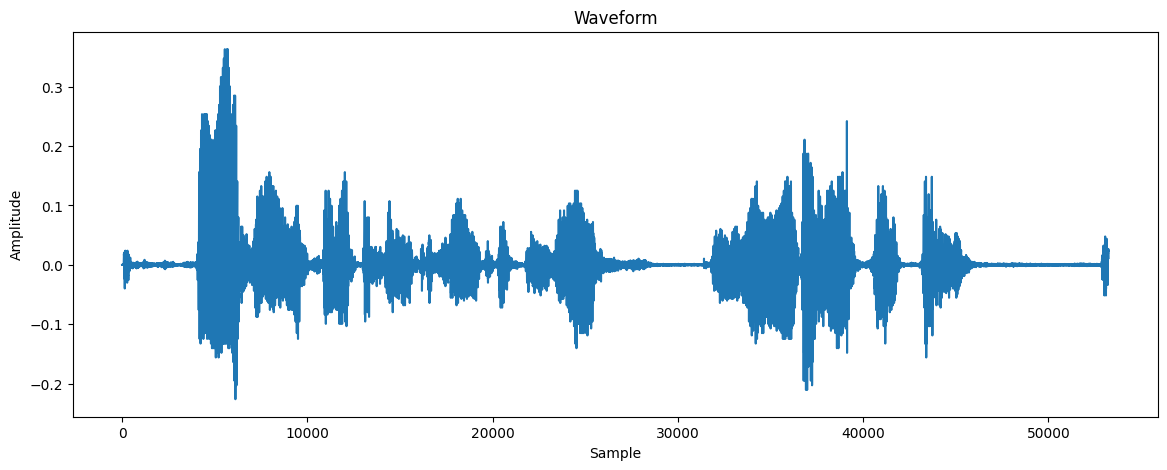

In [24]:
# for example plotting a waveform for an audio file

plt.figure(figsize=(14, 5))
plt.plot(array_lis[1])
plt.title('Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

In [25]:
# storing embeddings of all the audio arrays in a list ie. feature_embeddings[]

feature_embeddings = []
for i in array_lis:
  k=(librosa.feature.mfcc(y=i,sr=8000,n_mfcc = 1))    # audio array -> y , sampling rate -> sr
  feature_embeddings.append(k[0].tolist())

In the above step librosa mfcc is used to extract embeddings from audio arrays. n_mfcc parameter is set low because of limited resources (some loss of information will be there). Higher values can capture more information.

In [26]:
# creating nan padding for the embeddings
max_length = max(len(arr) for arr in feature_embeddings)
padded_arrays = [arr + [None] * (max_length - len(arr)) for arr in feature_embeddings]

# creating dataframe and assigning column names
df = pd.DataFrame(padded_arrays)
df.columns = [f'embedding_{i}' for i in range(1,len(df.columns)+1)]

In above step , as the audio are of different length so the embeddings are. We are require to pad the embeddings to make a dataframe, Later the nan values will be dropped from dataset.

In [27]:
df = df.dropna(axis=1)
df

,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,...,embedding_18,embedding_19,embedding_20,embedding_21,embedding_22,embedding_23,embedding_24,embedding_25,embedding_26,embedding_27
0,-554.508975,-505.321287,-541.910230,-537.760642,-507.454847,-499.832493,-509.019044,-505.721401,-506.293750,-510.869087,...,-460.551477,-461.880757,-472.027238,-482.343728,-493.404657,-506.744815,-506.967194,-496.845094,-491.342539,-508.240376
1,-328.535607,-319.393548,-383.956183,-404.410221,-427.421672,-454.548251,-442.601020,-358.798348,-286.582082,-254.476104,...,-224.480350,-270.240008,-328.069367,-321.145389,-245.830221,-221.087609,-220.749972,-267.152476,-343.998238,-266.555187
2,-577.860530,-548.383062,-527.013098,-469.253467,-395.852569,-374.188125,-386.917432,-418.005775,-435.930374,-438.267941,...,-248.684605,-140.001825,-90.592143,-48.240315,-46.009793,-92.806741,-99.422032,-114.058812,-153.509439,-178.590138
3,-522.414735,-476.592814,-468.928494,-482.459003,-481.434200,-475.442054,-463.301131,-443.190734,-422.869104,-433.783425,...,-54.602857,-75.790199,-53.053803,-71.698558,-163.409424,-175.675449,-21.141460,10.695641,-21.561265,-61.289200
4,-521.734186,-521.734186,-520.646755,-503.278237,-493.199283,-508.833141,-521.734186,-521.734186,-521.734186,-521.734186,...,-141.780368,-180.428055,-183.865217,-130.927967,-105.716026,-113.555956,-134.332732,-144.780866,-189.204698,-221.697056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,-615.861047,-613.331652,-613.166150,-612.770363,-612.591907,-613.005206,-612.712304,-613.214571,-614.380963,-613.768908,...,-518.287411,-604.215851,-611.311009,-612.964998,-612.611258,-613.664291,-614.369357,-612.860651,-613.346963,-614.246028
559,-452.740369,-386.631134,-374.541822,-380.596070,-382.645179,-380.696742,-383.921242,-385.748617,-378.694431,-279.220947,...,-26.883266,-13.252056,-8.791693,-49.114396,-41.754041,-45.182120,-93.935999,-69.002530,-71.827706,-180.868447
560,-397.072067,-399.426460,-541.979326,-575.415374,-575.675931,-579.486275,-583.005268,-583.550074,-584.461628,-584.259362,...,-492.756552,-567.831684,-570.264756,-574.528287,-582.717452,-583.982985,-584.034395,-584.221845,-583.790945,-583.802705
561,-418.390166,-135.317151,-94.638618,-186.147568,-372.562451,-344.233114,-330.572588,-356.651022,-397.207733,-343.522760,...,-117.310343,-88.715817,-53.202744,-59.847609,-104.122262,-86.732457,-82.436474,-133.541633,-176.752685,-130.266034


Above in the dataframe each row is an audio and each column is embedding. Thus 563 audio files and 27 embeddings for each.

In [28]:
# scatter plot of the dataframe with 27 embeddings
figure = px.scatter(df)
figure.show()

In [29]:
# using UMAP for reduction fo feature embeddings from 27 to 2 for visualizing

umap_2d = UMAP(n_components=2,init = 'random',random_state = 0)
data_2d = umap_2d.fit_transform(df)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [30]:
fig_2d = px.scatter(data_2d, x=0, y=1,title='2D plot')
fig_2d.show()

In above plot each datapoint represent the audio plotted based on 2 features which are extracted by the UMAP. The clusters of audio datapoints can clearly be seen